In [6]:
#  A Whale off the Port(folio)
#  ---

#  In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [ ]:
# Data Cleaning

# In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

# Files:

# * `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

# * `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

# * `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [3]:
## Whale Returns

#Read the Whale Portfolio daily returns and clean the data

In [7]:
# Reading whale returns
whale_path = Path("whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [8]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [9]:
# Drop nulls
whale_df = whale_df.dropna()

In [ ]:
## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [10]:
# Reading algorithmic returns
algo_path = Path("algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls
algo_df = algo_df.dropna()

In [14]:
## S&P 500 Returns

# Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [15]:
# Reading S&P 500 Closing Prices
sp500_path = Path("sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [16]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [17]:
# Clean identified numeric fields with $ symbol
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"]

/var/folders/gr/4p6yb5d551d7nwffvmpl_pg40000gn/T/ipykernel_83163/792102252.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [18]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [19]:
# Calculate Daily Returns
sp500_return = sp500_df.pct_change()
sp500_return

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [20]:
# Drop nulls
sp500_return = sp500_return.dropna()
sp500_return.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [21]:
# Rename `Close` Column to be specific to this portfolio.
sp500_return = sp500_return.rename(columns={
    "Close": "S&P500"})
sp500_return.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [ ]:
## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_portfolio = pd.concat([whale_df, algo_df, sp500_return], axis = "columns", join = "inner")
joined_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [ ]:
# # Conduct Quantitative Analysis

# In this section, you will calculate and visualize performance and risk metrics for the portfolios.

In [ ]:
## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

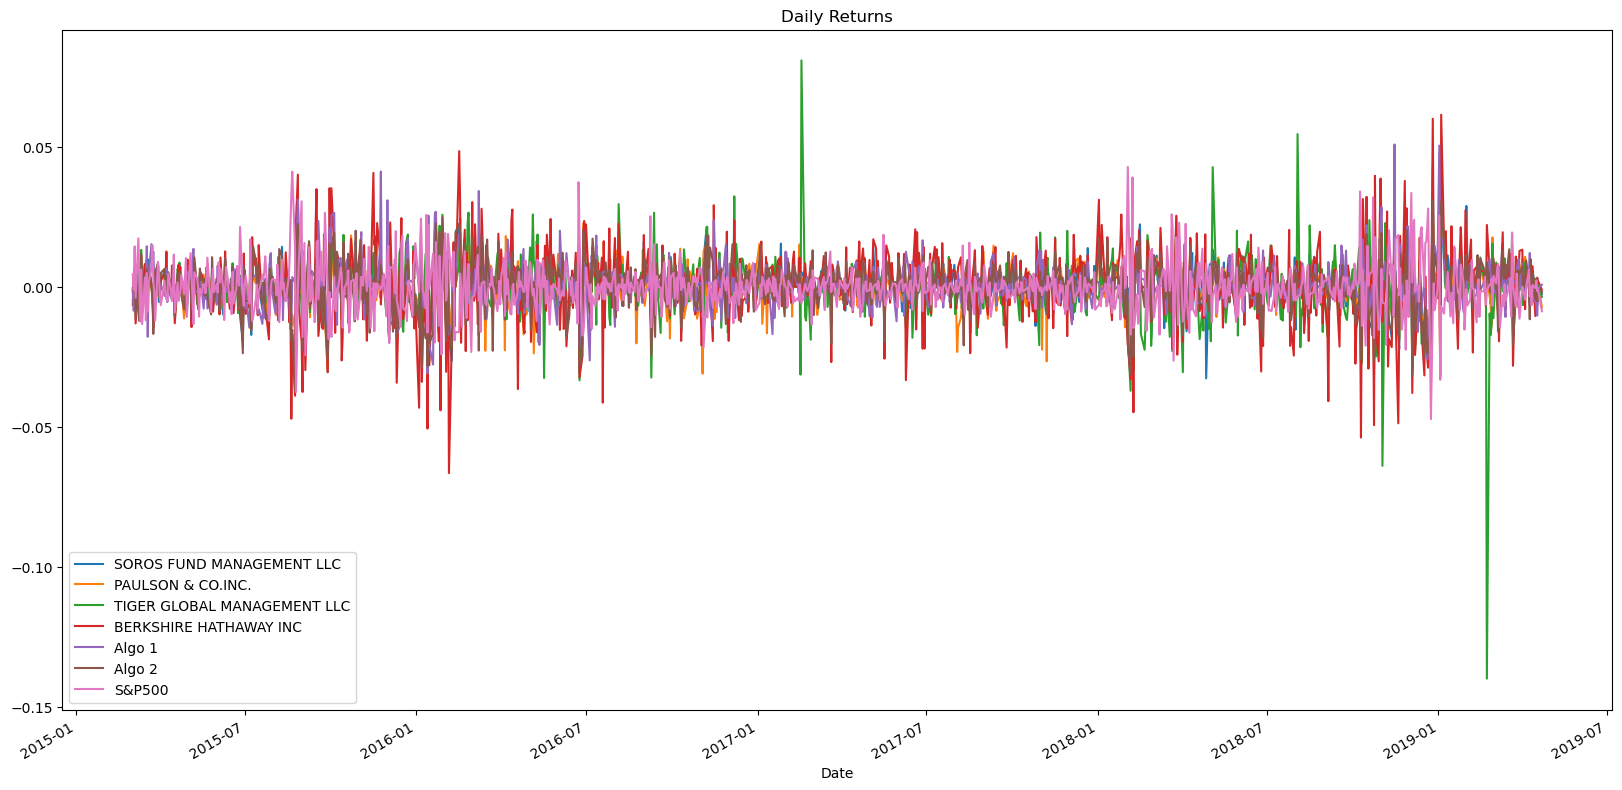

In [23]:
# Plot daily returns of all portfolios
joined_portfolio.plot(title = "Daily Returns", figsize = (20, 10))

In [ ]:
#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

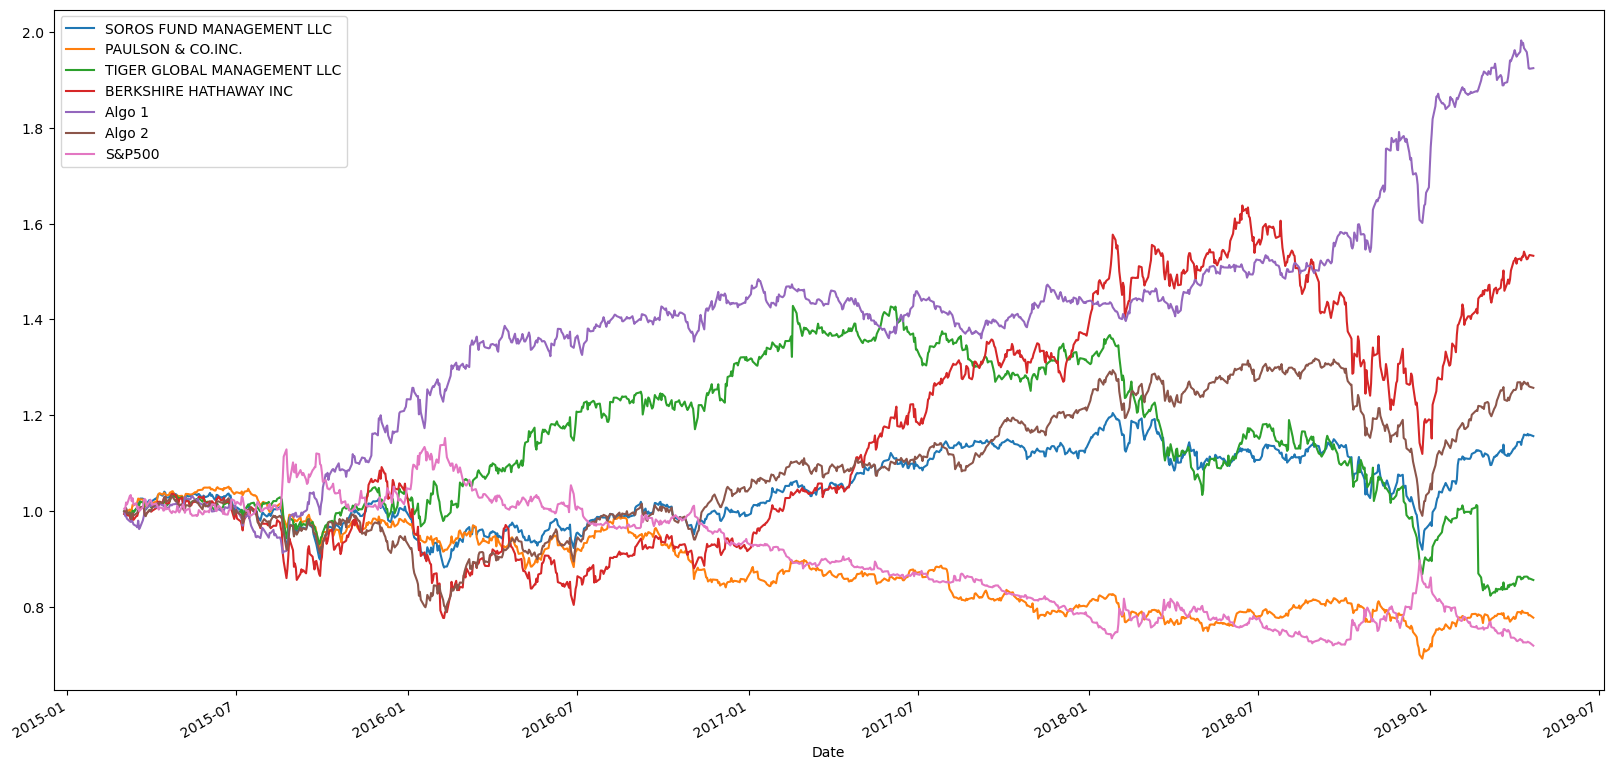

In [24]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_portfolio).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize = (20, 10))

In [ ]:
### Create a box plot for each portfolio


<Axes: title={'center': 'Portfolio Risk'}>

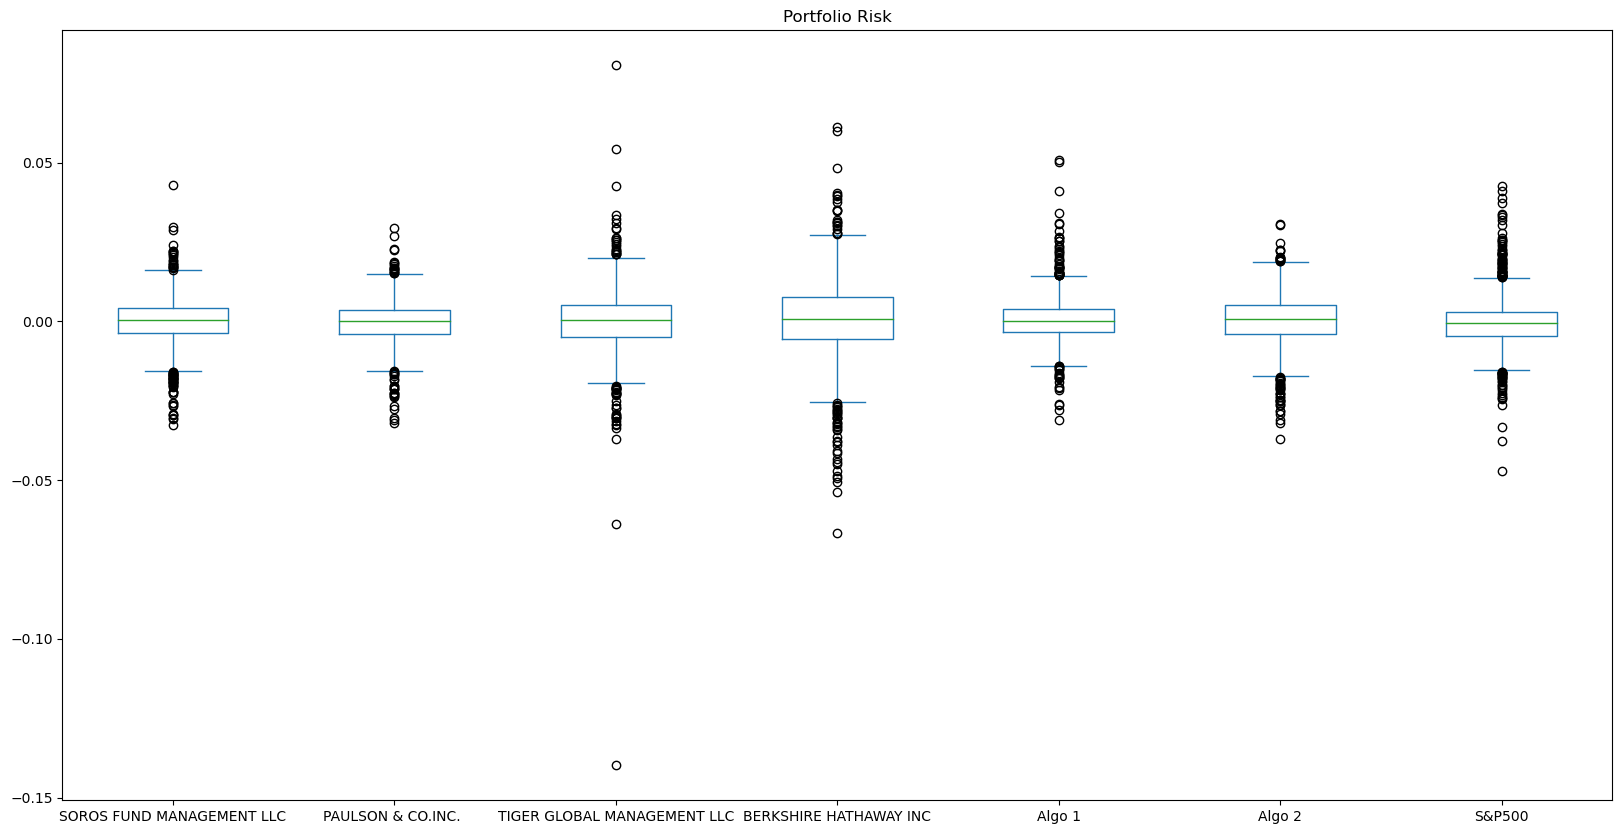

In [26]:
# Box plot to visually show risk
joined_portfolio.plot.box(title = "Portfolio Risk", figsize = (20, 10))

In [ ]:
### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_portfolio.std().sort_values(ascending = True)
daily_std

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P500                         0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [28]:
### Determine which portfolios are riskier than the S&P 500

In [29]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = daily_std["S&P500"]

# Determine which portfolios are riskier than the S&P 500
portfolios_riskier_than_SP500 = [daily_std > sp500_std]
portfolios_riskier_than_SP500

[PAULSON & CO.INC.              False
 Algo 1                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 2                         False
 S&P500                         False
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 dtype: bool]

In [30]:
### Calculate the Annualized Standard Deviation

In [31]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std.sort_values(ascending = True)

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P500                         0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

In [33]:
# ## Rolling Statistics

# Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

# 1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
# 2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
# 3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

In [34]:
### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': '21 Day Rolling Standard Deviation'}, xlabel='Date'>

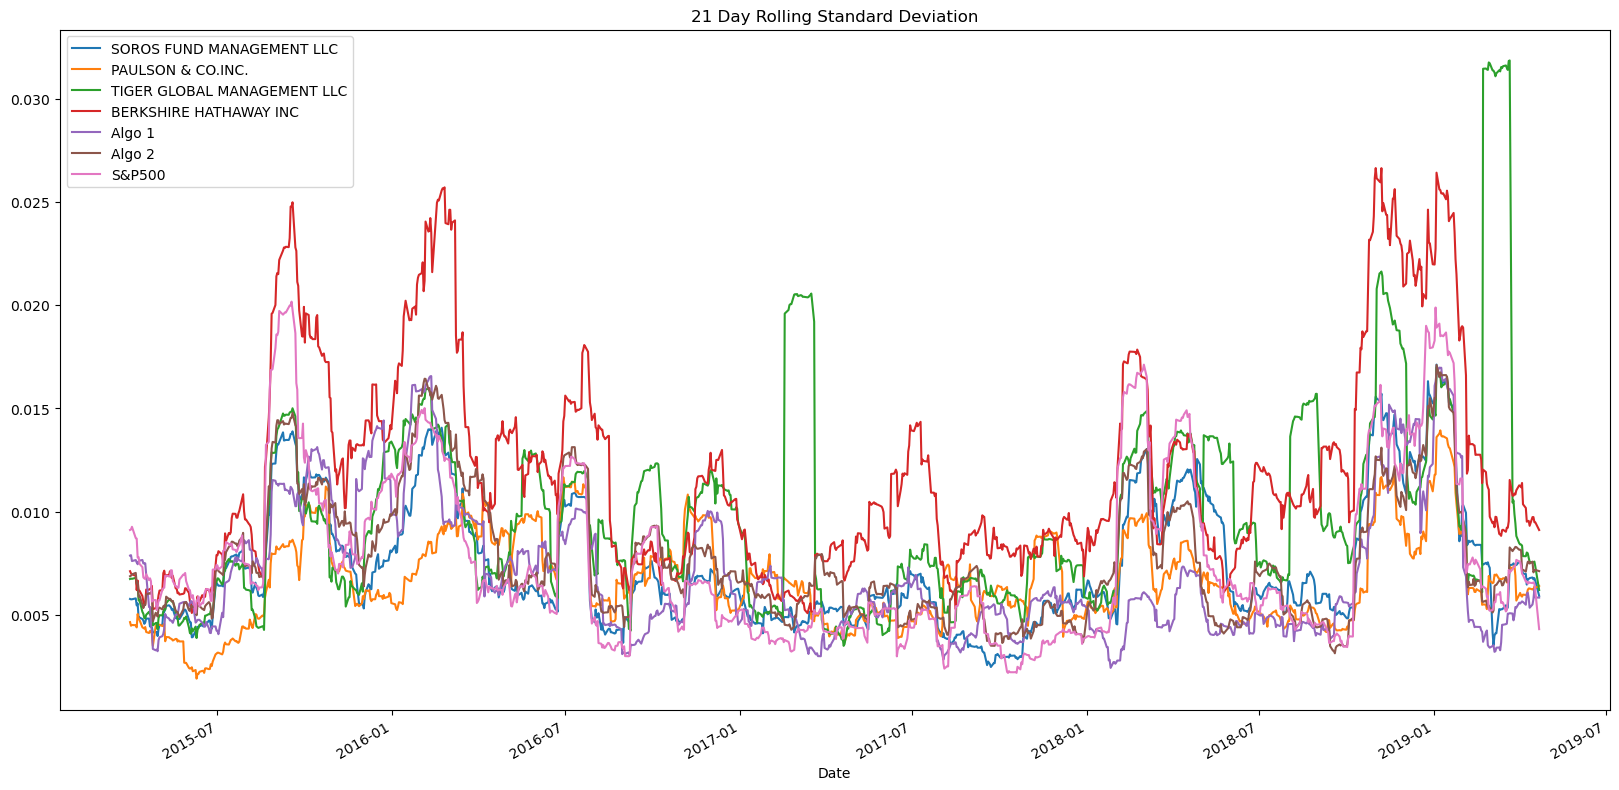

In [35]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_portfolio_std21 = joined_portfolio.rolling(window=21).std()
# Plot the rolling standard deviation
joined_portfolio_std21.plot(title = "21 Day Rolling Standard Deviation", figsize = (20, 10))

In [36]:
### Calculate and plot the correlation

<Axes: >

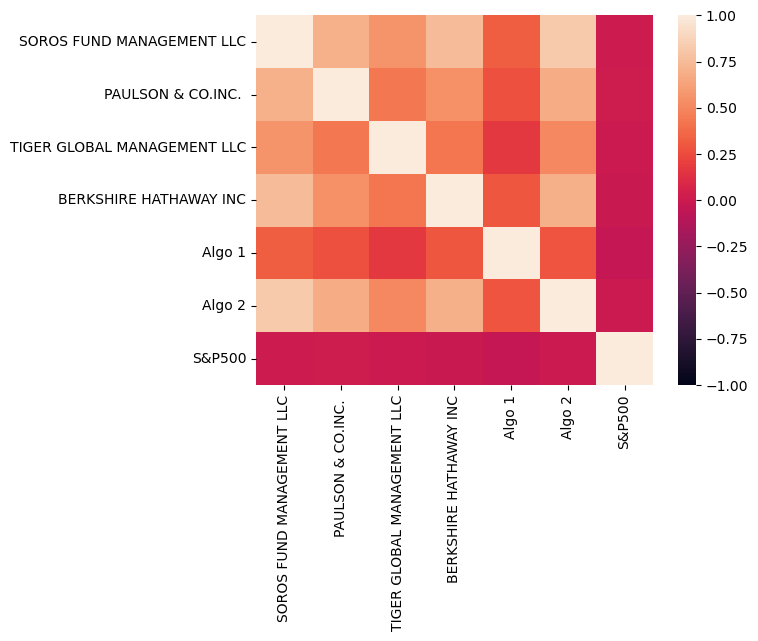

In [37]:
# Calculate the correlation
correlation = joined_portfolio.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

In [38]:
### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Algo 1 Beta'}, xlabel='Date'>

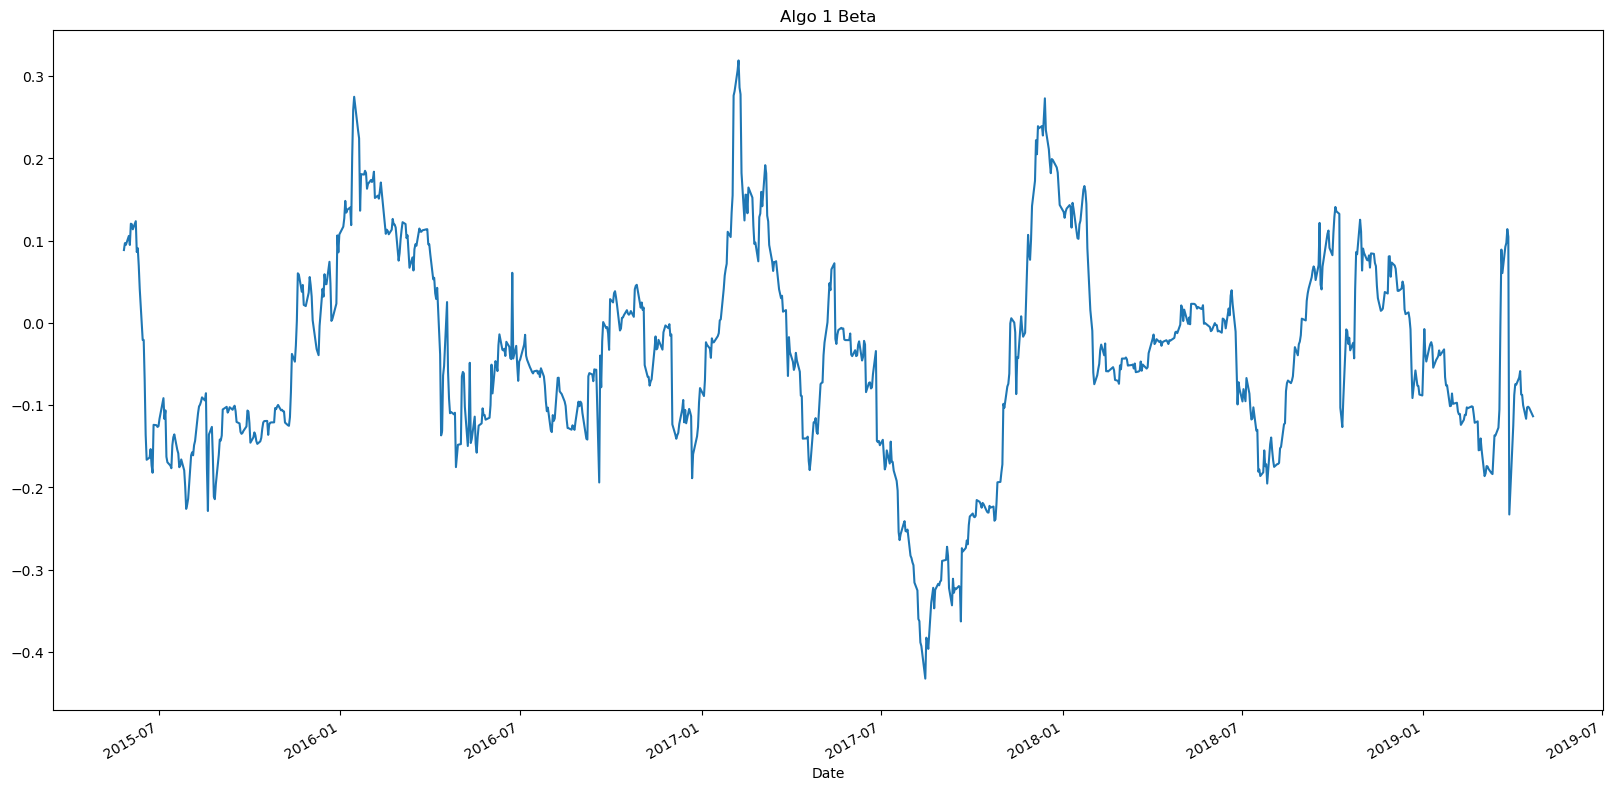

In [39]:
# Calculate covariance of a single portfolio
algo_1_covariance = joined_portfolio["Algo 1"].rolling(window=60).cov(joined_portfolio["S&P500"])
algo_1_covariance

# Calculate variance of S&P 500
sp500_variance = joined_portfolio["S&P500"].rolling(window=60).var()
sp500_variance

# Computing beta
algo_1_beta = algo_1_covariance / sp500_variance

# Plot beta trend
algo_1_beta.plot(title = "Algo 1 Beta", figsize = (20, 10))

In [41]:
# ## Rolling Statistics Challenge: Exponentially Weighted Average 

# An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': '21 Day Exponentially Weighted Average'}, xlabel='Date'>

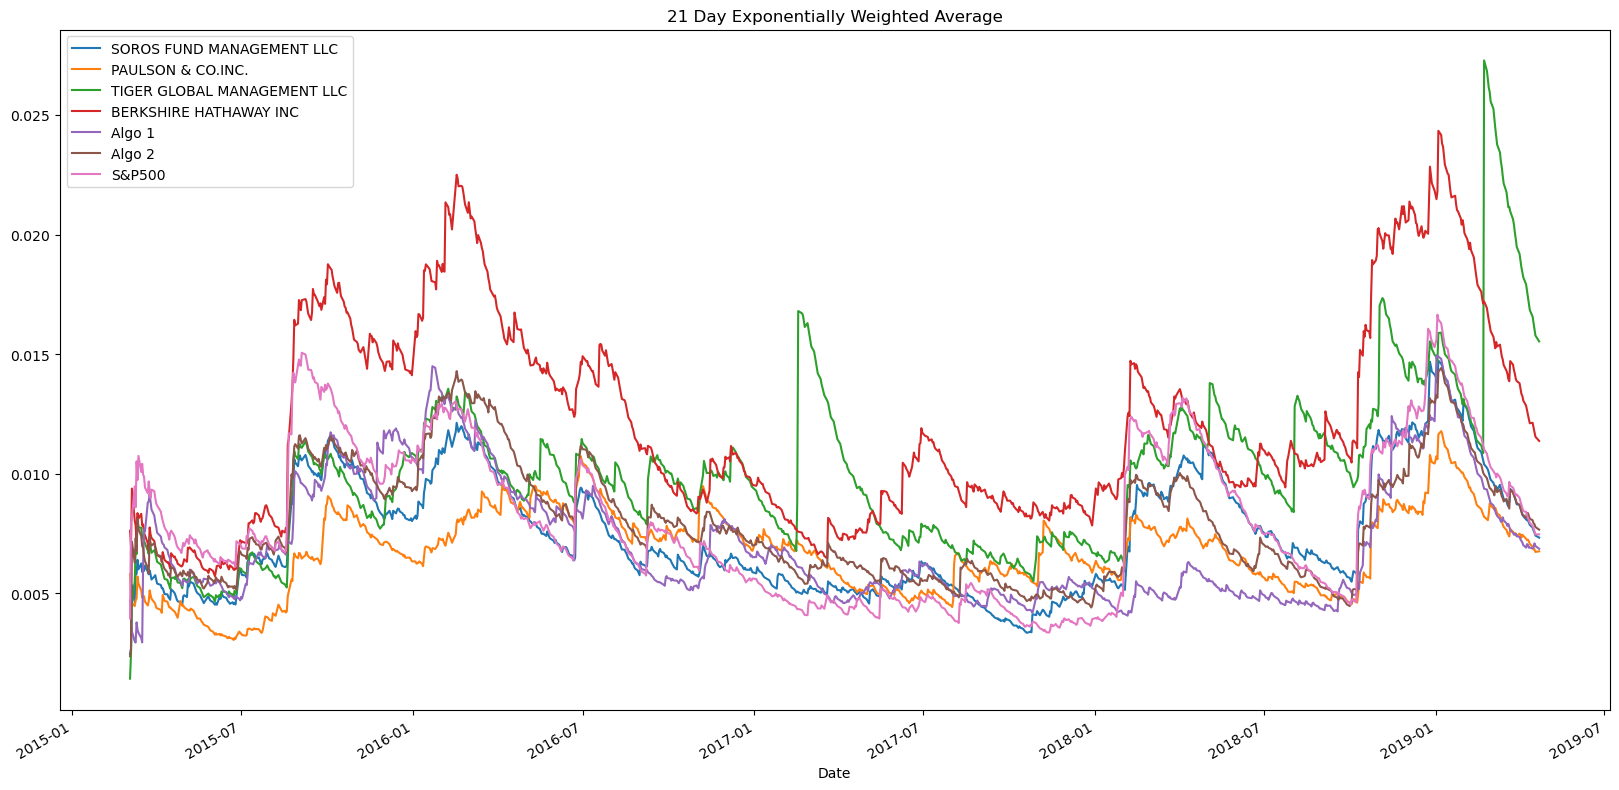

In [42]:
# Use `ewm` to calculate the rolling window
ewm = joined_portfolio.ewm(halflife = 21).std()
ewm.plot(title = "21 Day Exponentially Weighted Average", figsize = (20, 10))

In [43]:
# # Sharpe Ratios
# In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

# ### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Annualized Sharpe Ratios
sharpe_ratio = (joined_portfolio.mean() * 252) / (joined_portfolio.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

<Axes: title={'center': 'Sharpe Ratio'}>

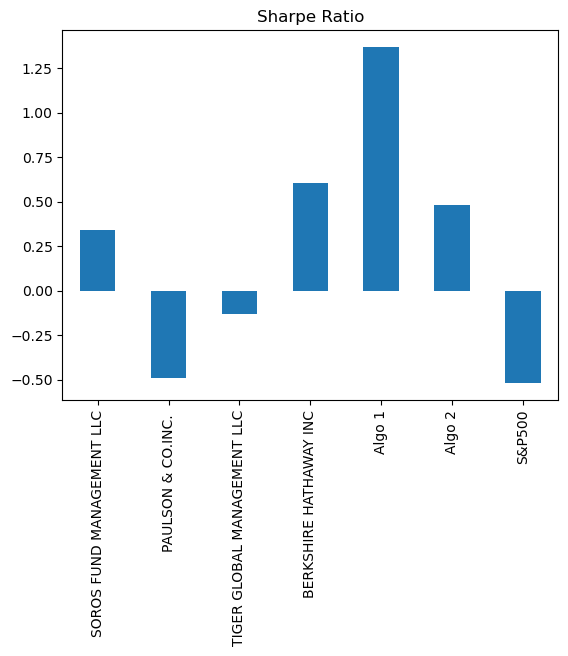

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = "bar", title = "Sharpe Ratio")

In [ ]:
# ### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

# As shown in the Sharpe Ratio plot, Algorithm 1 has the highest ratio which indicates a better risk-adjusted performance compared to the rest.

In [46]:
# # Create Custom Portfolio

# In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

# 1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
# 2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
# 3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
# 4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
# 5. Include correlation analysis to determine which stocks (if any) are correlated

In [47]:
## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [48]:
# Reading data from 1st stock
aapl_history_csv = Path("aapl_historical.csv")
aapl_history_df = pd.read_csv(aapl_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
aapl_history_df = aapl_history_df.drop(columns = ["Symbol"])
aapl_history_df.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [49]:
# Reading data from 2nd stock
cost_history_csv = Path("cost_historical.csv")
cost_history_df = pd.read_csv(cost_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
cost_history_df = cost_history_df.drop(columns = ["Symbol"])
cost_history_df.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [50]:
# Reading data from 3rd stock
goog_history_csv = Path("goog_historical.csv")
goog_history_df = pd.read_csv(goog_history_csv, index_col = "Trade DATE", parse_dates = True, infer_datetime_format = True)
goog_history_df = goog_history_df.drop(columns = ["Symbol"])
goog_history_df.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [51]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_history_df, cost_history_df, goog_history_df], axis = "columns", join = "inner")
combined_df.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [53]:
# Reset Date index
combined_df.sort_index(inplace = True)

In [54]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ["AAPL", "COST", "GOOG"]
combined_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [55]:
# Calculate daily returns
combined_returns = combined_df.pct_change()

# Drop NAs
combined_returns.dropna(inplace = True)

# Display sample data
combined_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [56]:
## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [111]:
# Set weights
weights = [0.1, 0.1, 0.1]

# Calculate portfolio return
combined_df_weighted_return = combined_df.dot(weights)
combined_df_weighted_return = combined_df_weighted_return.rename("CustomPF")

# Display sample data
combined_df_weighted_return.head()


Trade DATE
2018-05-11    148.261
2018-05-14    148.423
2018-05-15    146.115
2018-05-16    146.866
2018-05-17    146.518
Name: CustomPF, dtype: float64

In [58]:
## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [112]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio = pd.concat([combined_df_weighted_return, joined_portfolio], axis = "columns", join = "inner")
combined_portfolio.head()

,CustomPF,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2018-05-11,148.261,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883
2018-05-14,148.423,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,146.115,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,146.866,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,146.518,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639


In [113]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio.dropna()

,CustomPF,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2018-05-11,148.261,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883
2018-05-14,148.423,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,146.115,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,146.866,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,146.518,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
...,...,...,...,...,...,...,...,...
2019-04-15,166.666,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,167.172,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,168.503,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,168.604,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


<Axes: title={'center': 'Combined Portfolio Risk'}>

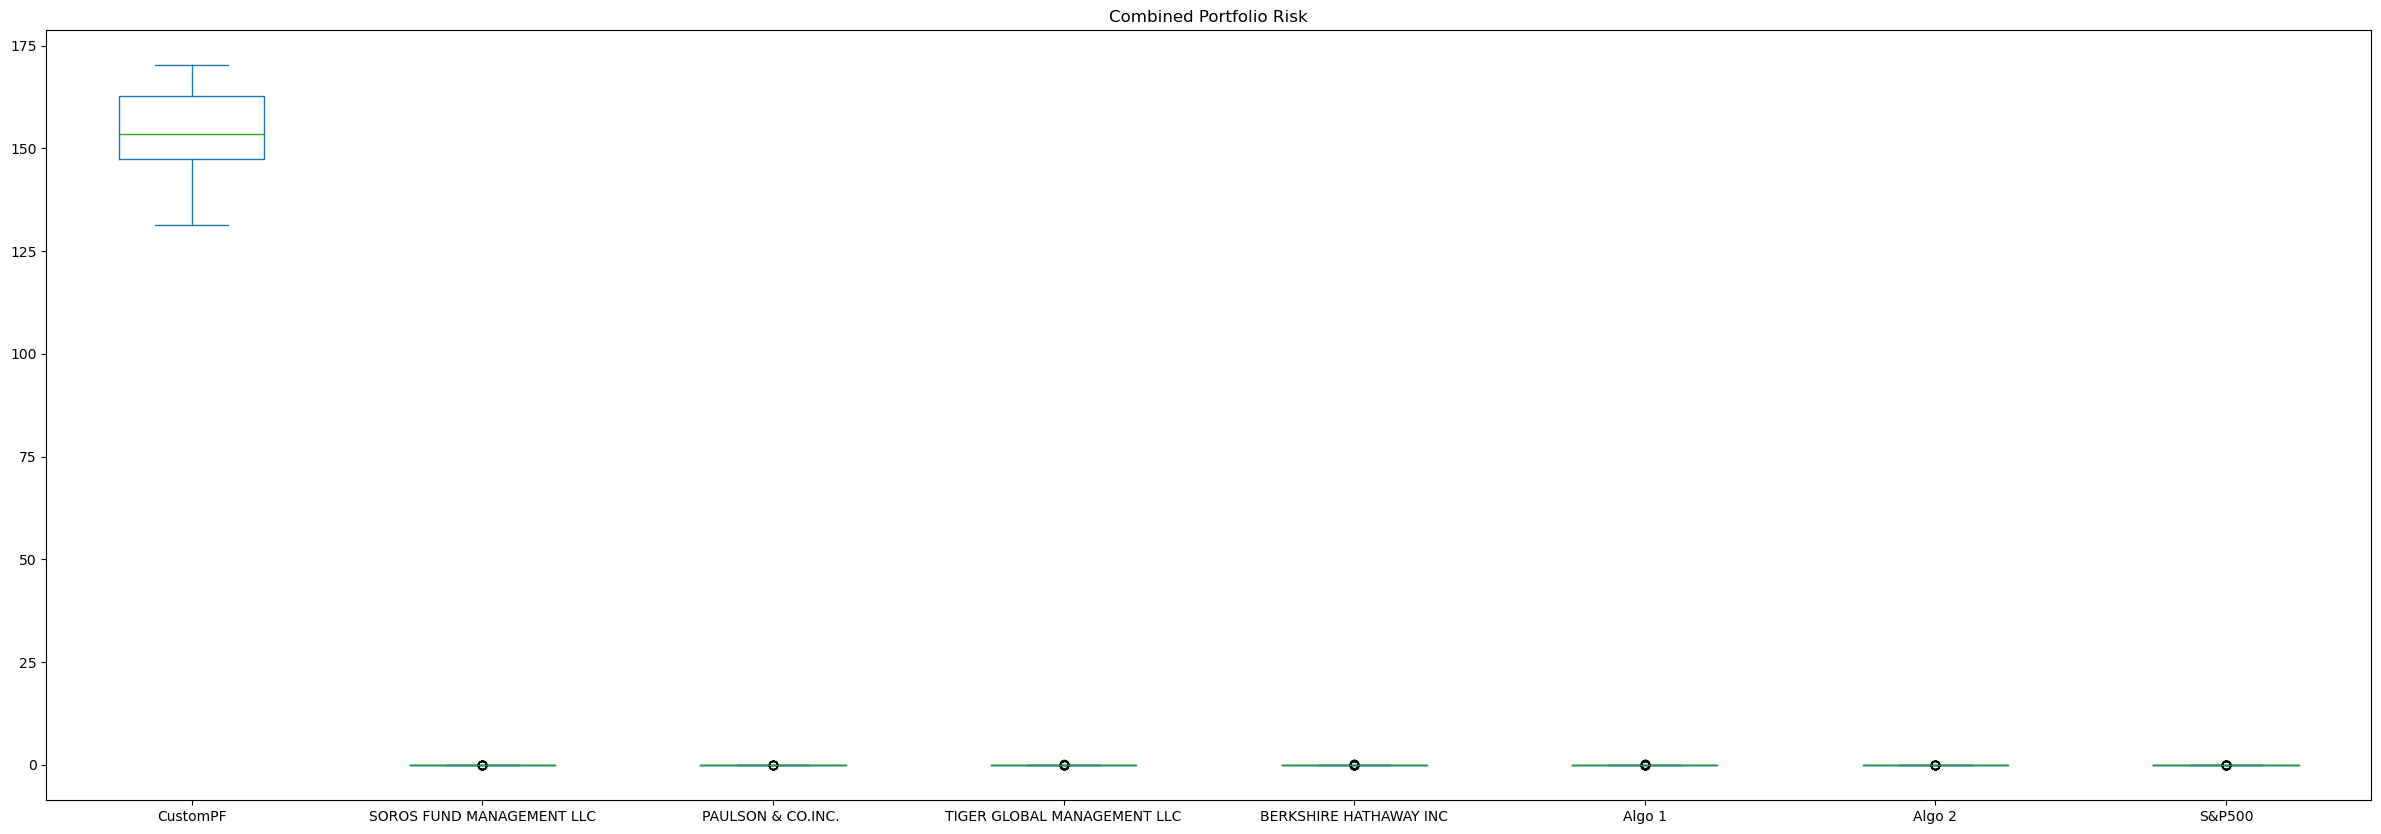

In [114]:
## Re-run the risk analysis with your portfolio to see how it compares to the others
combined_portfolio.plot.box(title = "Combined Portfolio Risk", figsize = (30, 10))

In [62]:
### Calculate the Annualized Standard Deviation

In [115]:
# Calculate the daily standard deviations of all portfolios
daily_std_combined = combined_portfolio.std().sort_values(ascending = True)
daily_std_combined

PAULSON & CO.INC.              0.007350
Algo 1                         0.008419
Algo 2                         0.008769
SOROS FUND MANAGEMENT LLC      0.009234
S&P500                         0.009584
TIGER GLOBAL MANAGEMENT LLC    0.014642
BERKSHIRE HATHAWAY INC         0.015548
CustomPF                       8.868805
dtype: float64

In [116]:
# Calculate the annualized `std`

annual_std_combined = daily_std_combined * np.sqrt(252)
annual_std_combined.sort_values(ascending = True)

PAULSON & CO.INC.                0.116683
Algo 1                           0.133645
Algo 2                           0.139204
SOROS FUND MANAGEMENT LLC        0.146589
S&P500                           0.152147
TIGER GLOBAL MANAGEMENT LLC      0.232434
BERKSHIRE HATHAWAY INC           0.246819
CustomPF                       140.787915
dtype: float64

In [ ]:
### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': '21 Day Rolling Standard Deviation of Combined Portfolio'}>

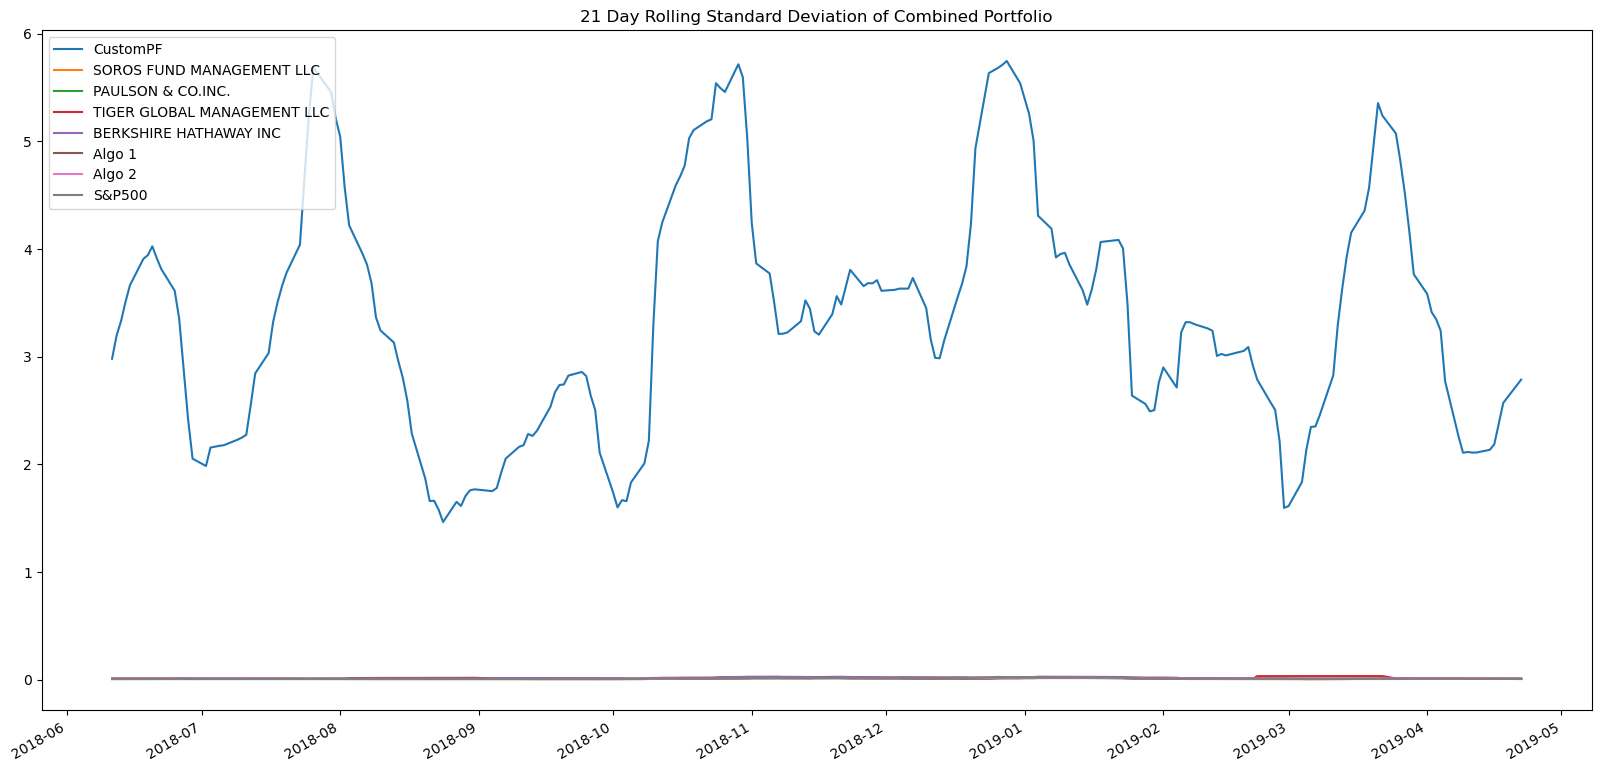

In [117]:
# Calculate rolling standard deviation

combined_portfolio_std21 = combined_portfolio.rolling(window=21).std()

# Plot rolling standard deviation
combined_portfolio_std21.plot(title = "21 Day Rolling Standard Deviation of Combined Portfolio", figsize = (20, 10))

In [ ]:
### Calculate and plot the correlation


<Axes: >

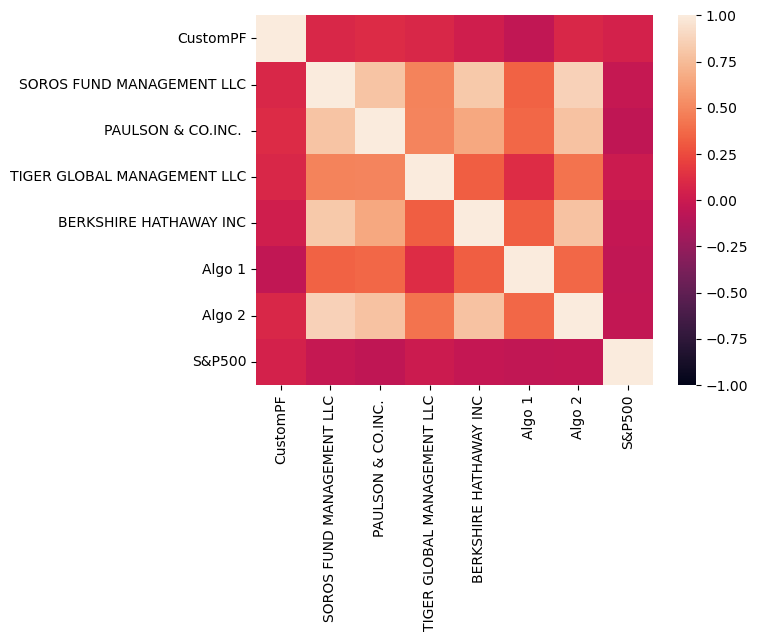

In [118]:
# Calculate and plot the correlation
correlation = combined_portfolio.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

In [ ]:
### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'CustomPF'}>

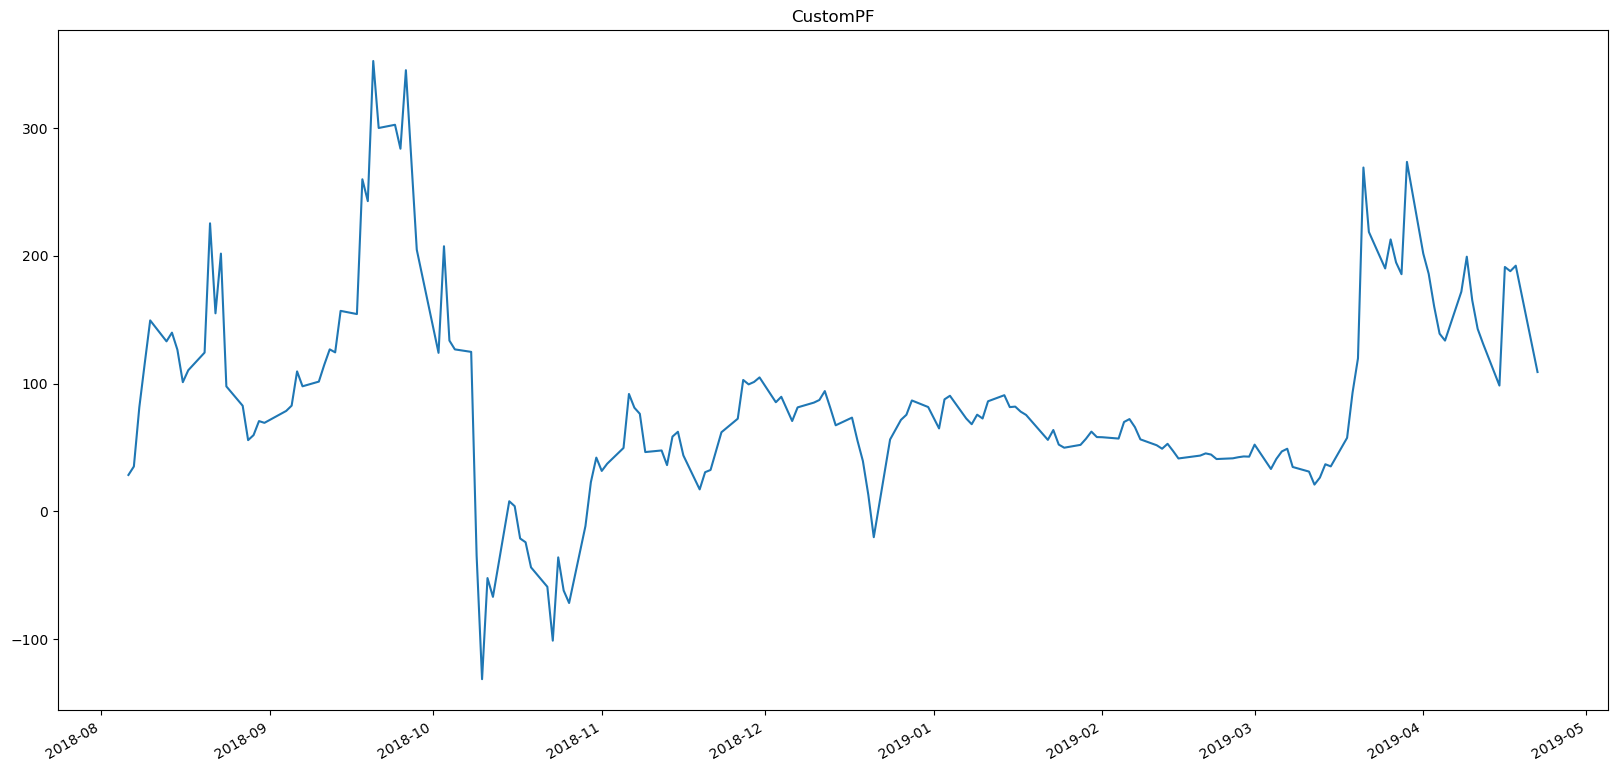

In [119]:
# Calculate and plot Beta
combined_portfolio_covariance = combined_portfolio["CustomPF"].rolling(window=60).cov(combined_portfolio["S&P500"])
combined_portfolio_covariance

# Calculate covariance of a single portfolio
sp500_variance_combined = combined_portfolio["S&P500"].rolling(window=60).var()
sp500_variance_combined


# Computing beta for Combined Portfolio
combined_portfolio_beta = combined_portfolio_covariance / sp500_variance_combined

# Plot beta trend
combined_portfolio_beta.plot(title = "CustomPF", figsize = (20, 10))

In [88]:
### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot


In [135]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio_combinedpf = (combined_portfolio.mean() * 252) / (combined_portfolio.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

<Axes: title={'center': 'Sharpe Ratio CustomPF'}>

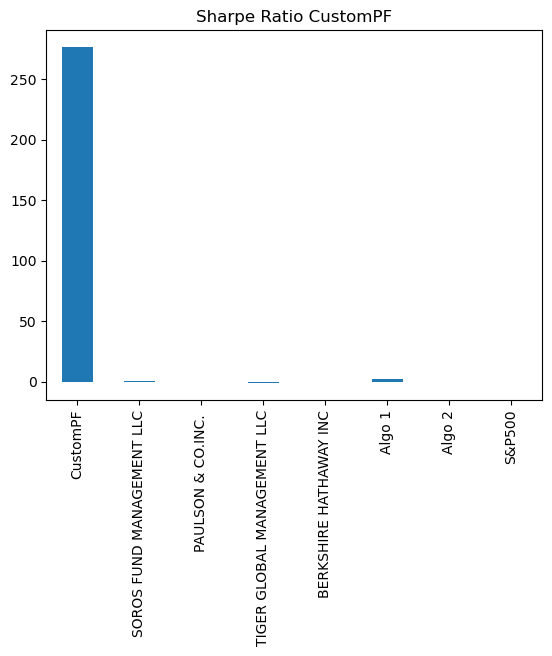

In [136]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_combinedpf.plot(kind = "bar", title = "Sharpe Ratio CustomPF")

In [ ]:
### How does your portfolio do?

Write your answer here!